In [1]:
import pandas as pd
import numpy as np
import datetime
import re
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn import metrics
from sklearn.metrics import r2_score

In [2]:
# Predict number of tickets based on the day of the week

In [3]:
df0 = pd.read_csv("Data/parking-tickets-2022/Parking_Tags_Data_2022.000.csv", converters={'time_of_infraction': str})
df1 = pd.read_csv("Data/parking-tickets-2022/Parking_Tags_Data_2022.001.csv", converters={'time_of_infraction': str})
df2 = pd.read_csv("Data/parking-tickets-2022/Parking_Tags_Data_2022.002.csv", converters={'time_of_infraction': str})
df3 = pd.read_csv("Data/parking-tickets-2022/Parking_Tags_Data_2022.003.csv", converters={'time_of_infraction': str})
df4 = pd.read_csv("Data/parking-tickets-2022/Parking_Tags_Data_2022.004.csv", converters={'time_of_infraction': str})
df5 = pd.read_csv("Data/parking-tickets-2022/Parking_Tags_Data_2022.005.csv", converters={'time_of_infraction': str})
df6 = pd.read_csv("Data/parking-tickets-2022/Parking_Tags_Data_2022.006.csv", converters={'time_of_infraction': str})
df7 = pd.read_csv("Data/parking-tickets-2022/Parking_Tags_Data_2022.007.csv", converters={'time_of_infraction': str})

In [4]:
df2022 = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7], ignore_index=True)

In [5]:
df0 = pd.read_csv("Data/parking-tickets-2021/Parking_Tags_Data_2021.000.csv", converters={'time_of_infraction': str})
df1 = pd.read_csv("Data/parking-tickets-2021/Parking_Tags_Data_2021.001.csv", converters={'time_of_infraction': str})
df2 = pd.read_csv("Data/parking-tickets-2021/Parking_Tags_Data_2021.002.csv", converters={'time_of_infraction': str})
df3 = pd.read_csv("Data/parking-tickets-2021/Parking_Tags_Data_2021.003.csv", converters={'time_of_infraction': str})
df4 = pd.read_csv("Data/parking-tickets-2021/Parking_Tags_Data_2021.004.csv", converters={'time_of_infraction': str})
df5 = pd.read_csv("Data/parking-tickets-2021/Parking_Tags_Data_2021.005.csv", converters={'time_of_infraction': str})
df6 = pd.read_csv("Data/parking-tickets-2021/Parking_Tags_Data_2021.006.csv", converters={'time_of_infraction': str})
df7 = pd.read_csv("Data/parking-tickets-2021/Parking_Tags_Data_2021.007.csv", converters={'time_of_infraction': str})
df8 = pd.read_csv("Data/parking-tickets-2021/Parking_Tags_Data_2021.008.csv", converters={'time_of_infraction': str})
df9 = pd.read_csv("Data/parking-tickets-2021/Parking_Tags_Data_2021.009.csv", converters={'time_of_infraction': str})
df10 = pd.read_csv("Data/parking-tickets-2021/Parking_Tags_Data_2021.010.csv", converters={'time_of_infraction': str})
df11 = pd.read_csv("Data/parking-tickets-2021/Parking_Tags_Data_2021.011.csv", converters={'time_of_infraction': str})
df12 = pd.read_csv("Data/parking-tickets-2021/Parking_Tags_Data_2021.012.csv", converters={'time_of_infraction': str})
df13 = pd.read_csv("Data/parking-tickets-2021/Parking_Tags_Data_2021.013.csv", converters={'time_of_infraction': str})
df14 = pd.read_csv("Data/parking-tickets-2021/Parking_Tags_Data_2021.014.csv", converters={'time_of_infraction': str})

In [6]:
df2021 = pd.concat([df0, df1, df2, df3, df4, df5, df6, df7,df8, df9, df10, df11, df12, df13, df14], ignore_index=True)

In [7]:
df2022.head()

,tag_number_masked,date_of_infraction,infraction_code,infraction_description,set_fine_amount,time_of_infraction,location1,location2,location3,location4,province
0,***73863,20220101,29,PARK PROHIBITED TIME NO PERMIT,30,0003,OPP,233 COLERIDGE AVE,NaN,NaN,ON
1,***46942,20220101,15,PARK-WITHIN 3M OF FIRE HYDRANT,100,0005,NR,25 TOWN CENTRE CRT,NaN,NaN,ON
2,***73864,20220101,29,PARK PROHIBITED TIME NO PERMIT,30,0005,NR,252 COLERIDGE AVE,NaN,NaN,MA
3,***63914,20220101,9,STOP-SIGNED HWY-PROHIBIT TM/DY,100,0006,NR,70 DAN LECKIE WAY,NaN,NaN,ON
4,***73865,20220101,29,PARK PROHIBITED TIME NO PERMIT,30,0006,NR,262 COLERIDGE AVE,NaN,NaN,ON


In [8]:
df = pd.concat([df2021,df2022], ignore_index=True)

In [9]:
df_con = df

In [10]:
#extract street name from street address
df_con['street_name'] = df_con['location2'].str.extractall(r"([A-Z]+)").groupby(level=0).sum(numeric_only=False)

In [11]:
#extract day_of_year, day_of_week, and year from date
df_con['date_of_infraction_str'] = df_con['date_of_infraction'].astype(str)
df_con['date'] = pd.to_datetime(df_con['date_of_infraction_str'], format='%Y%m%d')

df_con['day_of_year'] = df_con['date'].dt.dayofyear
df_con['day_of_week'] = df_con['date'].dt.dayofweek
df_con['year'] = df_con['date'].dt.year

In [12]:
print(df_con.head())

  tag_number_masked  date_of_infraction  infraction_code  \
0          ***92621            20210101                3   
1          ***42843            20210101                3   
2          ***47171            20210101                3   
3          ***42844            20210101                3   
4          ***42848            20210101                3   

     infraction_description  set_fine_amount time_of_infraction location1  \
0  PARK ON PRIVATE PROPERTY               30               0013        AT   
1  PARK ON PRIVATE PROPERTY               30               0026       NaN   
2  PARK ON PRIVATE PROPERTY               30               0029       NaN   
3  PARK ON PRIVATE PROPERTY               30               0029       NaN   
4  PARK ON PRIVATE PROPERTY               30               0040       NaN   

             location2 location3 location4 province     street_name  \
0  1440 LAWRENCE AVE W       NaN       NaN       ON    LAWRENCEAVEW   
1        33 GABIAN WAY       NaN  

In [13]:
# select columns that we are interested in  
df_init = df_con.filter(['street_name','day_of_year', 'day_of_week', 'year'], axis=1)

In [14]:
grouper = df_init.groupby(['year'])
df_year = grouper['street_name'].count().to_frame(name = 'count').reset_index()
df_year

,year,count
0,2021,1481612
1,2022,1821768


In [15]:
# There are less tickets in 2021 which it can be due to restriction for Covid-19 

In [16]:
grouper = df_init.groupby(['day_of_week'])
df_week = grouper['street_name'].count().to_frame(name = 'count').reset_index()
df_week

,day_of_week,count
0,0,466266
1,1,532874
2,2,542504
3,3,517492
4,4,512816
5,5,403473
6,6,327955


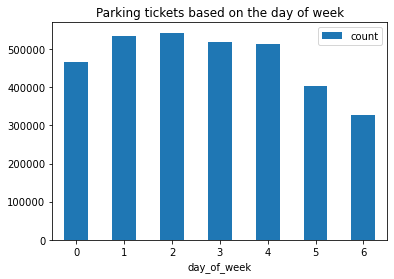

In [17]:
ax = df_week.plot.bar(x='day_of_week', title='Parking tickets based on the day of week', rot=0)

In [18]:
# There are less tickets on weekends, minimum on Sunday and maximum on Wednesday

In [19]:
grouper = df_init.groupby(['street_name'])
df_street = grouper['street_name'].count().to_frame(name = 'count').reset_index()
df_street

,street_name,count
0,AAACOXWELLAVE,1
1,AAAKNIGHTST,2
2,AAAMAINST,1
3,AAAMORTIMERAVE,2
4,AABERDEENAVE,1
...,...,...
16520,ZEZELWAY,116
16521,ZHOWARDST,1
16522,ZHUNTLEYST,3
16523,ZLINDENST,2


In [20]:
# number of streets with less than 1000 tickets
df_street_sub1 = df_street[df_street['count'] <= 1000]
df_street_sub1.shape

(15914, 2)

In [21]:
# number of streets with tickets between 1000 and 10000
df_street_sub2 = df_street[(df_street['count'] > 1000) & (df_street['count'] <= 10000)]
df_street_sub2.shape

(571, 2)

In [22]:
# number of streets with tickets more than 10000
df_street_sub3 = df_street[(df_street['count'] > 10000)]
df_street_sub3.shape

(40, 2)

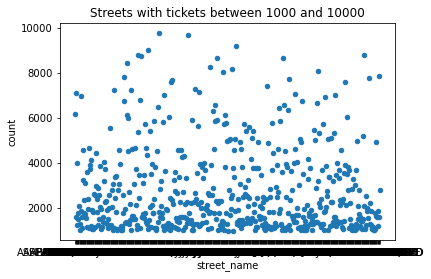

In [23]:
df_street_sub2.plot(kind = 'scatter', x = 'street_name', y = 'count', title='Streets with tickets between 1000 and 10000')
plt.show()

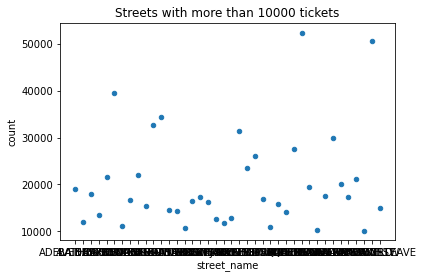

In [24]:
df_street_sub3.plot(kind = 'scatter', x = 'street_name', y = 'count', title='Streets with more than 10000 tickets')
plt.show()

In [25]:
# streets with maximum number of tickets
print(df_street_sub3.sort_values(by=['count'], ascending=False))

           street_name  count
12365         QUEENSTW  52411
16431          YONGEST  50699
2166          BLOORSTW  39627
4868         DUNDASSTW  34358
4206       DANFORTHAVE  32674
8213           KEELEST  31478
14157      STCLAIRAVEW  30018
12358         QUEENSTE  27568
8690    LAKESHOREBLVDW  26083
8476           KINGSTW  23435
3705         COLLEGEST  22011
1589        BAYVIEWAVE  21680
15716    WELLINGTONSTW  21169
15248    UNIVERSITYAVE  20064
12711      RICHMONDSTW  19555
221        ADELAIDESTW  19026
1523        BATHURSTST  18041
14011       SPADINAAVE  17446
6116          FRONTSTE  17245
15467       VICTORIAST  17226
9871    MARINEPARADEDR  16909
3478          CHURCHST  16713
5326             ELMST  16499
6123          FRONTSTW  16195
10716         MUTUALST  15776
4100      CUMBERLANDST  15507
16468     YORKVILLEAVE  14970
5006     EASTLIBERTYST  14538
5112          EDWARDST  14384
11276     OSSINGTONAVE  14195
1579             BAYST  13446
7988          JARVISST  12912
6312      

In [26]:
grouper = df_init.groupby(['street_name', 'year', 'day_of_year', 'day_of_week'])
df_process = grouper['street_name'].count().to_frame(name = 'count').reset_index()
df_process

,street_name,year,day_of_year,day_of_week,count
0,AAACOXWELLAVE,2021,267,4,1
1,AAAKNIGHTST,2021,267,4,2
2,AAAMAINST,2021,267,4,1
3,AAAMORTIMERAVE,2021,267,4,2
4,AABERDEENAVE,2021,242,0,1
...,...,...,...,...,...
666195,ZORRAST,2022,356,3,19
666196,ZORRAST,2022,357,4,15
666197,ZORRAST,2022,360,0,20
666198,ZORRAST,2022,364,4,2


In [27]:
df_process.corr()

,year,day_of_year,day_of_week,count
year,1.000000,-0.120984,0.010412,0.024440
day_of_year,-0.120984,1.000000,-0.000833,0.034651
day_of_week,0.010412,-0.000833,1.000000,-0.007829
count,0.024440,0.034651,-0.007829,1.000000


In [28]:
df_process.street_name.nunique()

16525

In [29]:
# because there are alot of streets so we don't use One Hot encoder, instead we use label encoder
print(df_process.dtypes)  
df_process['street_name'] = df_process['street_name'].astype('category')  
df_process['street_code'] = df_process['street_name'].cat.codes  
print(df_process.dtypes) 
df_process.head()

street_name    object
year            int64
day_of_year     int64
day_of_week     int64
count           int64
dtype: object
street_name    category
year              int64
day_of_year       int64
day_of_week       int64
count             int64
street_code       int16
dtype: object


,street_name,year,day_of_year,day_of_week,count,street_code
0,AAACOXWELLAVE,2021,267,4,1,0
1,AAAKNIGHTST,2021,267,4,2,1
2,AAAMAINST,2021,267,4,1,2
3,AAAMORTIMERAVE,2021,267,4,2,3
4,AABERDEENAVE,2021,242,0,1,4


In [30]:
features = ['street_code', 'year', 'day_of_week']
target = ['count']

X = df_process[features]
y = df_process[target]


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Linear Regression

In [32]:
std_scaler = StandardScaler()
lin_reg = LinearRegression()
lin_regression = Pipeline([
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg)
])
res = lin_regression.fit(X_train, y_train)
y_train_pred = res.predict(X_train)
y_test_pred = res.predict(X_test)
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R-square train: ', r2_score(y_train, y_train_pred)) 
print('R-square test: ', r2_score(y_test, y_test_pred)) 


RMSE:  8.539769244669376
R-square train:  0.0006802331999767874
R-square test:  0.0005881342403007972


# Reconsider input data

In [33]:
# r squared is zero which means the model doesn't perform beter than a mean value so we recoside the input features
# we don't use street name as a feature but instead we have a model for each street, and we implement it for a street
# with highest number of tickets which is QUEENSTW

In [34]:
print(df_process[df_process.street_name == 'QUEENSTW'])

       street_name  year  day_of_year  day_of_week  count  street_code
486564    QUEENSTW  2021            1            4      7        12365
486565    QUEENSTW  2021            2            5      3        12365
486566    QUEENSTW  2021            3            6     14        12365
486567    QUEENSTW  2021            4            0     11        12365
486568    QUEENSTW  2021            5            1     36        12365
...            ...   ...          ...          ...    ...          ...
487283    QUEENSTW  2022          361            1      4        12365
487284    QUEENSTW  2022          362            2    137        12365
487285    QUEENSTW  2022          363            3    110        12365
487286    QUEENSTW  2022          364            4    133        12365
487287    QUEENSTW  2022          365            5      9        12365

[724 rows x 6 columns]


In [35]:
df_process_yonge = df_process[df_process.street_code == 12365]

In [36]:
features = ['year', 'day_of_week']
target = ['count']

X = df_process_yonge[features]
y = df_process_yonge[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Linear Regression

In [37]:
std_scaler = StandardScaler()
lin_reg = LinearRegression()
lin_regression = Pipeline([
    ("std_scaler", std_scaler),
    ("lin_reg", lin_reg)
])
res = lin_regression.fit(X_train, y_train)
y_train_pred = res.predict(X_train)
y_test_pred = res.predict(X_test)
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R-square train: ', r2_score(y_train, y_train_pred)) 
print('R-square test: ', r2_score(y_test, y_test_pred)) 


RMSE:  40.095300621497934
R-square train:  0.37932077689462484
R-square test:  0.276243408796669


# Polynomial Regression

Text(0, 0.5, 'RMSE')

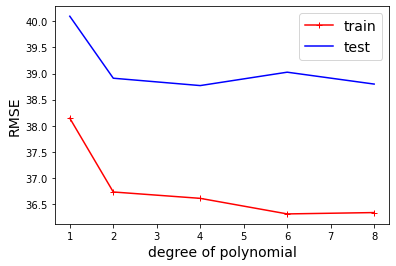

In [38]:
poly_degrees = [1, 2, 4, 6, 8]

train_errors, test_errors = [], []

for i in poly_degrees:
    poly_features = PolynomialFeatures(degree = i, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    poly_regression = Pipeline([
        ("poly_features", poly_features),
        ("std_scaler", std_scaler),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train)
    y_train_pred = poly_regression.predict(X_train)
    y_test_pred = poly_regression.predict(X_test)
    train_errors.append(math.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_errors.append(math.sqrt(mean_squared_error(y_test, y_test_pred)))
    
plt.plot(poly_degrees, train_errors, "r-+", label="train")
plt.plot(poly_degrees, test_errors, "b-", label="test")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("degree of polynomial", fontsize=14)
plt.ylabel("RMSE", fontsize=14)

In [39]:
# increasing the degree won't improve the model

# Stochastic Gradient Descent

In [40]:
std_scaler = StandardScaler()
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.1)
sgd_regression = Pipeline([
    ("std_scaler", std_scaler),
    ("sgd_reg", sgd_reg)
])
res = sgd_regression.fit(X_train, y_train)
y_train_pred = res.predict(X_train)
y_test_pred = res.predict(X_test)
print('RMSE: ', math.sqrt(mean_squared_error(y_test, y_test_pred)))
print('R-square train: ', r2_score(y_train, y_train_pred)) 
print('R-square test: ', r2_score(y_test, y_test_pred)) 


RMSE:  40.300405746143404
R-square train:  0.3746872385276312
R-square test:  0.2688198021714322


/Users/asmaa/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [41]:
# Linear Regression model performs slightly better than other models